# Visualization Concepts for Metabolite Quantile Scoring

In [1]:
import matplotlib.pyplot as plt
from openTSNE import TSNE as oTSNE
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

In [2]:
RESULTS_DIR = '../results/metabolite_quantiles/'
metab_scores = pd.read_csv(f'{RESULTS_DIR}metab_scores.csv')
quantile_assignments = pd.read_csv(f'{RESULTS_DIR}quantile_assignments.csv', index_col='row_id')

In [3]:
metab_scores

,outcome,AUROC,AUPRC,quantile_split,quantile_assignment,metab
0,bpd_any,0.727931,0.709042,C10_quant_3,0.0,C10
1,bpd_any,0.706811,0.696370,C10_quant_3,1.0,C10
2,bpd_any,0.714308,0.742261,C10_quant_3,2.0,C10
3,ivh_any,0.709133,0.661514,C10_quant_3,0.0,C10
4,ivh_any,0.704950,0.675350,C10_quant_3,1.0,C10
...,...,...,...,...,...,...
1443,rop_any,0.681407,0.569342,GLY_quant_5,0.0,GLY
1444,rop_any,0.668349,0.613620,GLY_quant_5,1.0,GLY
1445,rop_any,0.688688,0.632786,GLY_quant_5,2.0,GLY
1446,rop_any,0.712575,0.659027,GLY_quant_5,3.0,GLY


In [4]:
# One way to score which metabolites separate model performance is
# the absolute diff between the top quantile assignment and the bottom
def max_quantile_auroc_diff(df):
    return abs(df['AUROC'].max() - df['AUROC'].min())

metabolite_rankings = (metab_scores
                       .groupby(['outcome', 'quantile_split', 'metab'])
                       .apply(max_quantile_auroc_diff))
metabolite_rankings.name = 'diff_score'
rankings = pd.DataFrame(metabolite_rankings).reset_index().sort_values(['outcome', 'diff_score'], ascending=[True, False])
rankings


,outcome,quantile_split,metab,diff_score
81,bpd_any,RF_Y_quant_5,RF_Y,0.116932
77,bpd_any,RC_A_quant_5,RC_A,0.103699
45,bpd_any,C181_quant_5,C181,0.091082
87,bpd_any,TYR_quant_5,TYR,0.090427
85,bpd_any,RO_C_quant_5,RO_C,0.089777
...,...,...,...,...
304,rop_any,C121_quant_3,C121,0.012617
326,rop_any,C18_quant_3,C18,0.012040
308,rop_any,C141_quant_3,C141,0.010662
324,rop_any,C18OH_quant_3,C18OH,0.007829


In [5]:
assert metab_scores.shape == metab_scores.dropna().shape

In [6]:
# For any given outcome we expect scores corresponding to the number of quantile splits
metab_scores[
    (metab_scores['outcome'] == 'bpd_any') & (metab_scores['quantile_split'] == 'ARG_quant_3')]

,outcome,AUROC,AUPRC,quantile_split,quantile_assignment,metab
192,bpd_any,0.736929,0.744537,ARG_quant_3,0.0,ARG
193,bpd_any,0.706571,0.708143,ARG_quant_3,1.0,ARG
194,bpd_any,0.696558,0.694151,ARG_quant_3,2.0,ARG


In [7]:
rankings[rankings['outcome'] == 'bpd_any']

,outcome,quantile_split,metab,diff_score
81,bpd_any,RF_Y_quant_5,RF_Y,0.116932
77,bpd_any,RC_A_quant_5,RC_A,0.103699
45,bpd_any,C181_quant_5,C181,0.091082
87,bpd_any,TYR_quant_5,TYR,0.090427
85,bpd_any,RO_C_quant_5,RO_C,0.089777
...,...,...,...,...
58,bpd_any,MET_quant_3,MET,0.017118
32,bpd_any,C141_quant_3,C141,0.016299
50,bpd_any,C18_quant_3,C18,0.015358
38,bpd_any,C16OH_quant_3,C16OH,0.013780


In [8]:
quantile_assignments

,C10_quant_3,C05_quant_3,C05DC_quant_3,C18_quant_3,C181_quant_3,CIT_quant_3,C16OH_quant_3,C181OH_quant_3,C14_quant_3,C12_quant_3,...,C141_quant_5,XLE_quant_5,GLY_quant_5,bpd_any,ivh_any,nec_any,rop_any,num_outcomes,health_indicator,health_index
row_id,,,,,,,,,,,,,,,,,,,,,
6,0.0,0.0,1.0,2.0,2.0,1.0,0.0,2.0,0.0,1.0,...,1.0,1.0,0.0,0,0,0,1,1,0,0.524948
11,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,0,1,0,1,2,0,0.042206
13,2.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,...,2.0,2.0,2.0,0,0,0,1,1,0,0.000000
17,1.0,1.0,2.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,...,1.0,4.0,4.0,1,1,0,1,3,0,0.074335
19,0.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,4.0,2.0,1.0,0,0,0,0,0,1,0.199474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41396,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,2.0,3.0,1.0,0,0,0,0,0,1,0.705084
41397,1.0,2.0,0.0,2.0,2.0,2.0,1.0,0.0,0.0,2.0,...,3.0,4.0,3.0,0,0,0,0,0,1,0.873466
41400,2.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0,2.0,1.0,...,2.0,0.0,2.0,1,0,0,0,1,0,0.653314


In [9]:
three_quantile_cols = quantile_assignments.columns[quantile_assignments.columns.str.contains('_quant_3')]
five_quantile_cols = quantile_assignments.columns[quantile_assignments.columns.str.contains('_quant_5')]

In [10]:
len(three_quantile_cols), len(five_quantile_cols)

(46, 46)

In [11]:
three_q_df = quantile_assignments.drop(five_quantile_cols, axis=1)
five_q_df = quantile_assignments.drop(three_quantile_cols, axis=1)

In [12]:
three_q_df

,C10_quant_3,C05_quant_3,C05DC_quant_3,C18_quant_3,C181_quant_3,CIT_quant_3,C16OH_quant_3,C181OH_quant_3,C14_quant_3,C12_quant_3,...,C141_quant_3,XLE_quant_3,GLY_quant_3,bpd_any,ivh_any,nec_any,rop_any,num_outcomes,health_indicator,health_index
row_id,,,,,,,,,,,,,,,,,,,,,
6,0.0,0.0,1.0,2.0,2.0,1.0,0.0,2.0,0.0,1.0,...,0.0,1.0,0.0,0,0,0,1,1,0,0.524948
11,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0,1,0,1,2,0,0.042206
13,2.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,...,1.0,1.0,1.0,0,0,0,1,1,0,0.000000
17,1.0,1.0,2.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,...,1.0,2.0,2.0,1,1,0,1,3,0,0.074335
19,0.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,2.0,1.0,0.0,0,0,0,0,0,1,0.199474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41396,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0,0,0,0,0,1,0.705084
41397,1.0,2.0,0.0,2.0,2.0,2.0,1.0,0.0,0.0,2.0,...,2.0,2.0,2.0,0,0,0,0,0,1,0.873466
41400,2.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0,2.0,1.0,...,1.0,0.0,1.0,1,0,0,0,1,0,0.653314


In [13]:
five_q_df

,C10_quant_5,C05_quant_5,C05DC_quant_5,C18_quant_5,C181_quant_5,CIT_quant_5,C16OH_quant_5,C181OH_quant_5,C14_quant_5,C12_quant_5,...,C141_quant_5,XLE_quant_5,GLY_quant_5,bpd_any,ivh_any,nec_any,rop_any,num_outcomes,health_indicator,health_index
row_id,,,,,,,,,,,,,,,,,,,,,
6,1.0,0.0,3.0,3.0,3.0,2.0,0.0,2.0,0.0,2.0,...,1.0,1.0,0.0,0,0,0,1,1,0,0.524948
11,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0,1,0,1,2,0,0.042206
13,4.0,1.0,3.0,0.0,0.0,4.0,4.0,1.0,3.0,3.0,...,2.0,2.0,2.0,0,0,0,1,1,0,0.000000
17,2.0,2.0,3.0,1.0,1.0,3.0,3.0,1.0,0.0,1.0,...,1.0,4.0,4.0,1,1,0,1,3,0,0.074335
19,1.0,1.0,1.0,3.0,4.0,4.0,4.0,2.0,3.0,2.0,...,4.0,2.0,1.0,0,0,0,0,0,1,0.199474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41396,2.0,4.0,4.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,...,2.0,3.0,1.0,0,0,0,0,0,1,0.705084
41397,2.0,4.0,1.0,4.0,3.0,4.0,3.0,0.0,1.0,3.0,...,3.0,4.0,3.0,0,0,0,0,0,1,0.873466
41400,4.0,0.0,4.0,0.0,3.0,1.0,0.0,2.0,3.0,2.0,...,2.0,0.0,2.0,1,0,0,0,1,0,0.653314


In [14]:
n_clusters = [3, 4, 5, 6, 7, 8, 9, 10]
three_q_results = {c: None for c in n_clusters}
five_q_results = {c: None for c in n_clusters}
for c in n_clusters:
    cluster = KMeans(n_clusters=c)
    three_q_clusters = cluster.fit(three_q_df[three_quantile_cols])
    three_q_df[f'{c}_clusters_label'] = cluster.labels_
    five_q_clusters = cluster.fit(five_q_df[five_quantile_cols])
    five_q_df[f'{c}_clusters_label'] = cluster.labels_

In [15]:
three_q_df.columns

Index(['C10_quant_3', 'C05_quant_3', 'C05DC_quant_3', 'C18_quant_3',
       'C181_quant_3', 'CIT_quant_3', 'C16OH_quant_3', 'C181OH_quant_3',
       'C14_quant_3', 'C12_quant_3', 'PHE_quant_3', 'TYR_quant_3',
       'PRO_quant_3', 'C101_quant_3', 'RO_C_quant_3', 'R8_10_quant_3',
       'ARG_quant_3', 'C18OH_quant_3', 'C081_quant_3', 'RF_Y_quant_3',
       'ALA_quant_3', 'C03DC_quant_3', 'R3_2_quant_3', 'VAL_quant_3',
       'C121_quant_3', 'R14_12_quant_3', 'C02_quant_3', 'C182_quant_3',
       'OXP_quant_3', 'RA_O_quant_3', 'C16_quant_3', 'RF_C_quant_3',
       'FC_quant_3', 'ORN_quant_3', 'C051_quant_3', 'C04_quant_3',
       'RC_A_quant_3', 'C06_quant_3', 'RL_A_quant_3', 'C05OH_quant_3',
       'C08_quant_3', 'MET_quant_3', 'C14OH_quant_3', 'C141_quant_3',
       'XLE_quant_3', 'GLY_quant_3', 'bpd_any', 'ivh_any', 'nec_any',
       'rop_any', 'num_outcomes', 'health_indicator', 'health_index',
       '3_clusters_label', '4_clusters_label', '5_clusters_label',
       '6_clusters_labe

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


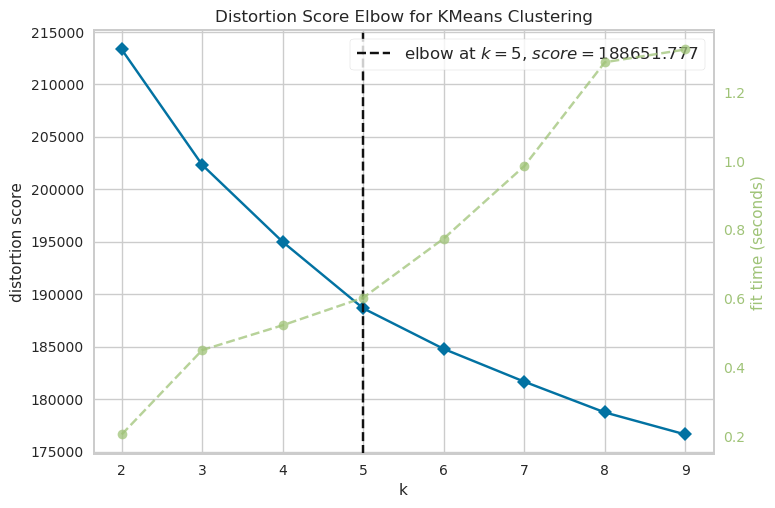

In [16]:
# Silhouette score for justifying clusters, or alternative scores
# With yellowbrick just for quick visualization.
# Starting first with the elbow plot with different metrics
vis = KElbowVisualizer(KMeans(), k=(2, 10))
vis.fit(three_q_df[three_quantile_cols])
vis.show();

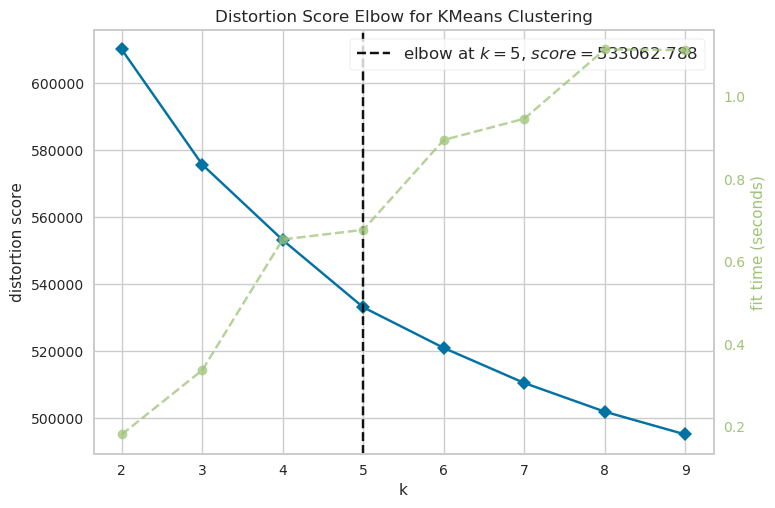

In [17]:
vis = KElbowVisualizer(KMeans(), k=(2, 10))
vis.fit(five_q_df[five_quantile_cols])
vis.show();

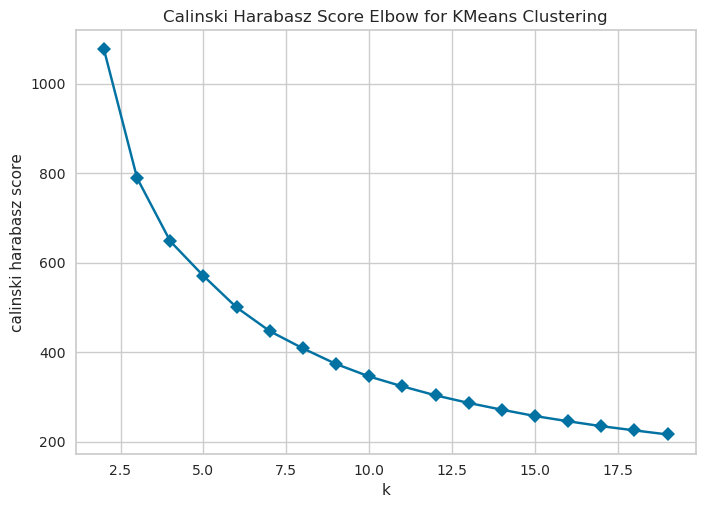

In [18]:
vis = KElbowVisualizer(
    KMeans(), k=(2, 20), metric='calinski_harabasz',
    timings=False, locate_elbow=False)
vis.fit(three_q_df[three_quantile_cols])
vis.show();

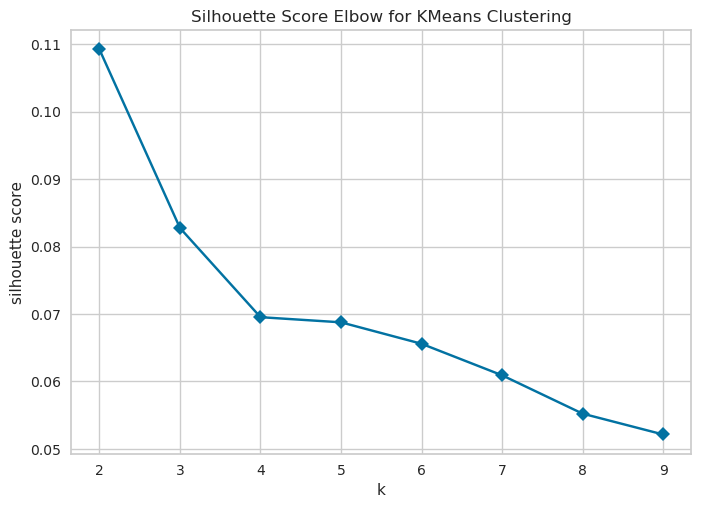

In [19]:
# Then Silhouette score
vis = KElbowVisualizer(
    KMeans(), k=(2, 10), metric='silhouette',
    timings=False, locate_elbow=False)
vis.fit(three_q_df[three_quantile_cols])
vis.show();

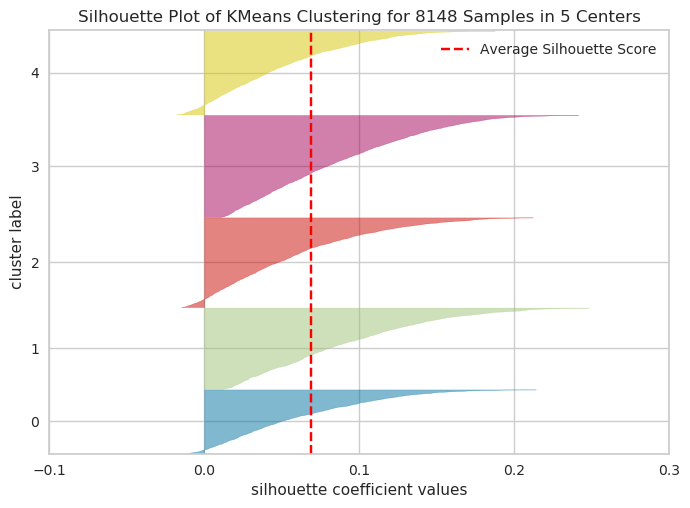

In [20]:
# Then Silhouette score
cluster = KMeans(5, random_state=101)
vis = SilhouetteVisualizer(cluster, colors='yellowbrick')
vis.fit(three_q_df[three_quantile_cols])
vis.show();

Elbow plot suggests that five clusters are the best but silhouette coefficient values are low.
(Might want to precompute distances with a different metric for cluster generation)

In [21]:
# Exploring with the openTSNE implementation if it's faster at higher perplexity
perplexity = 750
tsne = oTSNE(
    n_components=2, perplexity=perplexity,
    learning_rate='auto', random_state=100, n_jobs=24)
coords = tsne.fit(three_q_df[three_quantile_cols].values)
coords

TSNEEmbedding([[-2.70893203,  2.47771489],
               [-4.98488484,  0.59349202],
               [ 1.70598723, -4.87952843],
               ...,
               [ 0.38334825,  0.5920291 ],
               [ 1.69605196,  4.56613652],
               [-6.72600931, -2.33189081]])

In [22]:
# Now t-SNE with the best number of clusters
# Do the clusters correlate with n_outcomes?
# How different are the metabolites with regards to outcomes and clusters?
# Relative to the ability to separate model performance?
tsne = TSNE(
    n_components=2, perplexity=200, init='pca',
    learning_rate='auto', random_state=100)
coords = tsne.fit_transform(three_q_df[three_quantile_cols])
coords

/home/alanleec/mambaforge/envs/newborn-metabolic-health/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


array([[ -5.7596774 ,  -6.731977  ],
       [-11.43574   ,   0.40226698],
       [ -0.5713396 ,  12.933243  ],
       ...,
       [ -0.43416208,  -3.755359  ],
       [  1.0338137 ,  -8.655036  ],
       [-12.263066  ,   8.16082   ]], dtype=float32)

In [23]:
tsne_df = pd.DataFrame(coords, columns=['TSNE1', 'TSNE2'], index=three_q_df.index)
tsne_df = pd.merge(tsne_df, three_q_df.drop(three_quantile_cols, axis=1), left_index=True, right_index=True)
tsne_df

,TSNE1,TSNE2,bpd_any,ivh_any,nec_any,rop_any,num_outcomes,health_indicator,health_index,3_clusters_label,4_clusters_label,5_clusters_label,6_clusters_label,7_clusters_label,8_clusters_label,9_clusters_label,10_clusters_label
row_id,,,,,,,,,,,,,,,,,
6,-5.759677,-6.731977,0,0,0,1,1,0,0.524948,0,3,4,5,1,1,2,8
11,-11.435740,0.402267,0,1,0,1,2,0,0.042206,0,3,4,5,0,3,3,7
13,-0.571340,12.933243,0,0,0,1,1,0,0.000000,0,3,3,4,2,2,5,6
17,7.222109,-9.435332,1,1,0,1,3,0,0.074335,1,0,2,2,2,6,7,4
19,2.221501,9.922201,0,0,0,0,0,1,0.199474,1,0,2,4,4,5,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41396,8.251695,-10.636547,0,0,0,0,0,1,0.705084,1,0,2,4,2,2,5,6
41397,5.728390,3.327455,0,0,0,0,0,1,0.873466,2,1,1,0,4,5,1,0
41400,-0.434162,-3.755359,1,0,0,0,1,0,0.653314,2,1,0,1,6,0,8,5


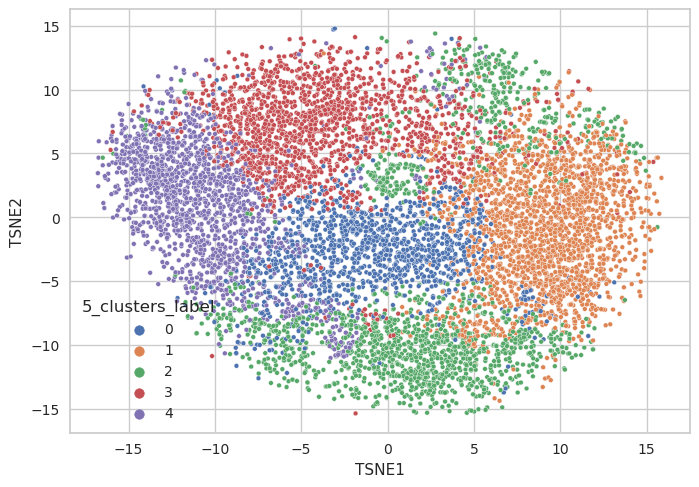

In [24]:
sns.scatterplot(
    x='TSNE1', y='TSNE2', hue='5_clusters_label', data=tsne_df,
    palette='deep', s=12)

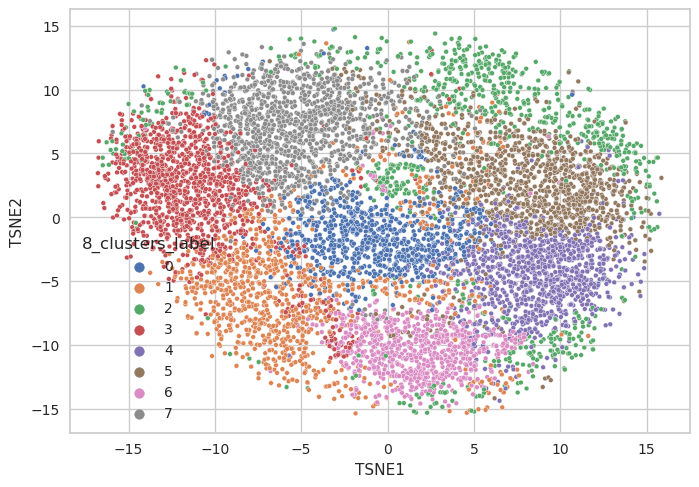

In [25]:
sns.scatterplot(
    x='TSNE1', y='TSNE2', hue='8_clusters_label', data=tsne_df,
    palette='deep', s=12)

### Patient-Level Correlation Network

In [26]:
pt_corr = three_q_df[three_quantile_cols].transpose().corr('spearman')
pt_corr_dist = 1 - abs(pt_corr)

In [27]:
pt_corr_dist.shape

(8148, 8148)

In [28]:
tsne = TSNE(perplexity=500, metric='precomputed', random_state=101)
coords = tsne.fit_transform(pt_corr_dist)

/home/alanleec/mambaforge/envs/newborn-metabolic-health/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/alanleec/mambaforge/envs/newborn-metabolic-health/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/alanleec/mambaforge/envs/newborn-metabolic-health/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


In [29]:
tsne_df = pd.DataFrame(coords, columns=['TSNE1', 'TSNE2'], index=three_q_df.index)
tsne_df = pd.merge(tsne_df, three_q_df.drop(three_quantile_cols, axis=1), left_index=True, right_index=True)

In [30]:
tsne_df.head()

,TSNE1,TSNE2,bpd_any,ivh_any,nec_any,rop_any,num_outcomes,health_indicator,health_index,3_clusters_label,4_clusters_label,5_clusters_label,6_clusters_label,7_clusters_label,8_clusters_label,9_clusters_label,10_clusters_label
row_id,,,,,,,,,,,,,,,,,
6,-2.893046,-2.116102,0,0,0,1,1,0,0.524948,0,3,4,5,1,1,2,8
11,-1.480137,-1.675147,0,1,0,1,2,0,0.042206,0,3,4,5,0,3,3,7
13,-3.305282,-3.656776,0,0,0,1,1,0,0.000000,0,3,3,4,2,2,5,6
17,0.835649,-2.148726,1,1,0,1,3,0,0.074335,1,0,2,2,2,6,7,4
19,-2.686646,1.844927,0,0,0,0,0,1,0.199474,1,0,2,4,4,5,4,9


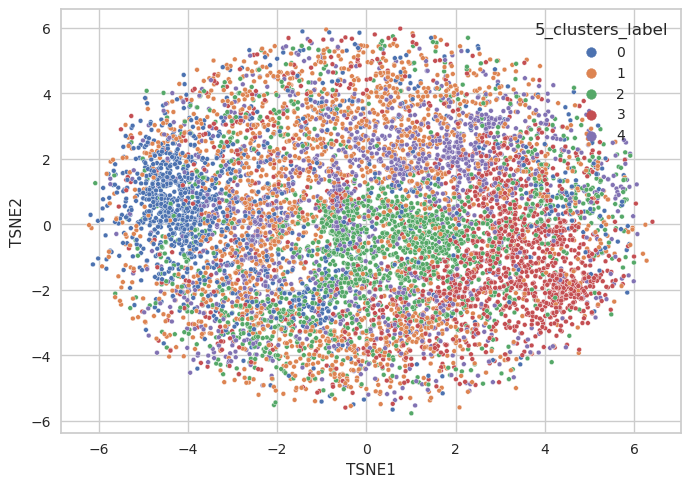

In [31]:
sns.scatterplot(
    x='TSNE1', y='TSNE2', hue='5_clusters_label', data=tsne_df,
    palette='deep', s=12)

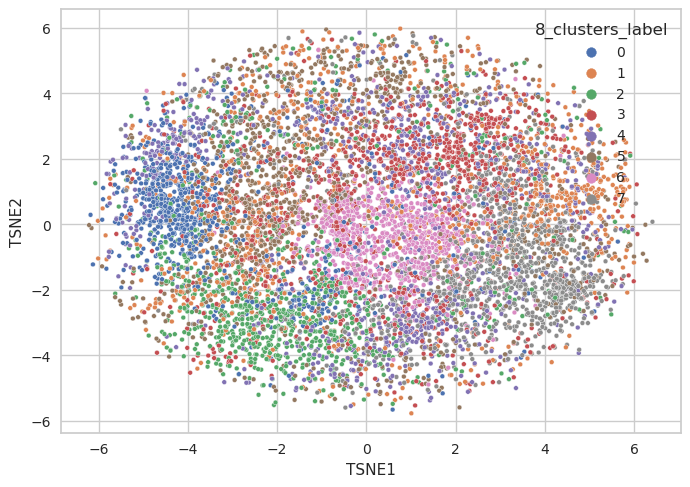

In [32]:
sns.scatterplot(
    x='TSNE1', y='TSNE2', hue='8_clusters_label', data=tsne_df,
    palette='deep', s=12);

### Exploration of Clustering on Prinicipal Components
The clusters are as of right now, not very distinct between individuals, how might clustering using PCAs (and possibly visualization with PCAs) improve the clusters?

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25, random_state=101)
three_q_pca = pca.fit_transform(three_q_df[three_quantile_cols])
three_q_pca = pd.DataFrame(three_q_pca, index=three_q_df.index, columns=[f'PCA{i}' for i in range(three_q_pca.shape[1])])
three_q_pca

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,...,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24
row_id,,,,,,,,,,,,,,,,,,,,,
6,2.004918,0.697985,2.276609,-1.668345,1.440189,1.448218,-0.343754,0.271290,-1.942884,-0.899786,...,0.435597,-1.029192,0.112779,0.213342,0.404674,0.156495,-0.107789,0.160092,0.979985,-0.650129
11,4.543951,0.658320,0.856950,-0.793411,0.269980,1.252117,0.465767,0.721272,-0.129039,0.607953,...,0.731693,0.526996,0.595144,0.675682,0.099653,0.056429,-0.426595,0.186232,-1.456458,0.041657
13,0.759298,0.267122,-1.113057,1.907908,-1.618993,-1.060016,0.484593,0.191292,-0.261708,-0.300694,...,0.896101,0.153796,-1.169642,-0.008171,-0.257533,-0.578224,-0.415106,-0.483731,0.589512,-0.619430
17,-2.044680,2.235743,0.075431,1.473972,2.124673,-0.641694,0.739363,0.492980,0.350758,-0.152066,...,-0.005661,1.172278,-0.361158,0.325774,0.528378,0.338514,-0.438140,-1.031746,-0.013462,-0.384797
19,-0.813948,0.435834,-1.323940,-0.406990,0.534857,2.687536,1.006524,-0.548182,-1.601050,-0.029146,...,1.196994,1.121893,0.884026,0.314525,-0.249002,0.209911,0.267898,0.742658,-0.996802,-0.857857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41396,-1.514727,1.347301,0.225047,0.977256,-0.848944,1.426151,0.296900,1.126246,0.195640,-0.947052,...,0.008380,-0.403796,0.085458,-0.895787,1.109807,0.259714,0.648901,1.340432,0.466724,-1.084625
41397,-1.668182,-0.213210,-0.651415,-1.713929,-0.274109,0.131496,2.953439,0.363351,0.351922,-2.153128,...,1.044525,1.777318,0.272153,-0.024397,0.158825,-0.484111,-0.574505,-0.348401,0.906148,-0.315059
41400,-0.211922,-0.881133,2.378783,1.221725,-0.803290,0.537642,-0.488283,1.055125,-2.233795,-0.094746,...,-1.100364,-2.044993,-0.255711,0.406854,0.748822,1.024354,0.714593,0.102853,0.030369,0.360761


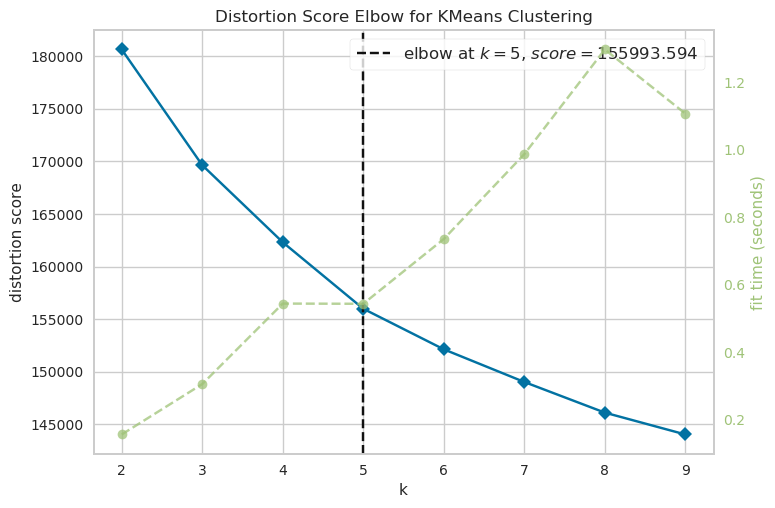

In [34]:
vis = KElbowVisualizer(KMeans(), k=(2, 10))
vis.fit(three_q_pca)
vis.show();

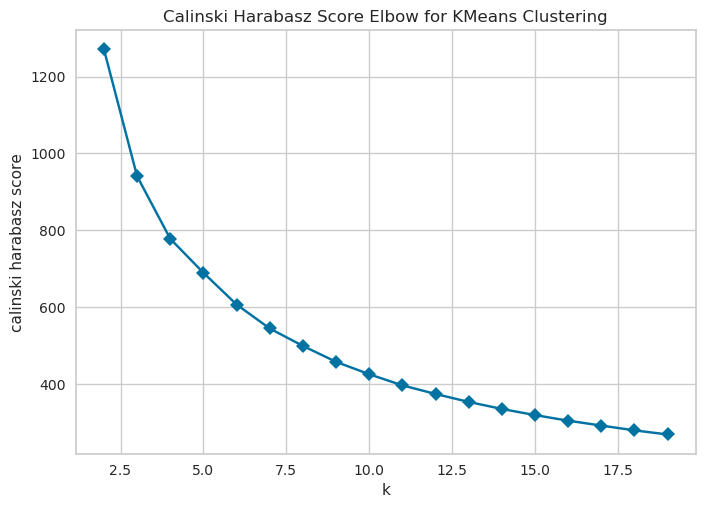

In [35]:
vis = KElbowVisualizer(
    KMeans(), k=(2, 20), metric='calinski_harabasz',
    timings=False, locate_elbow=False)
vis.fit(three_q_pca)
vis.show();

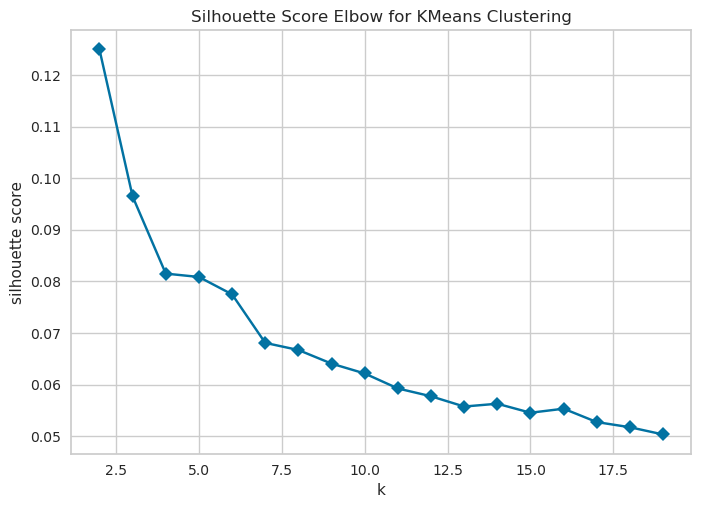

In [36]:
vis = KElbowVisualizer(
    KMeans(), k=(2, 20), metric='silhouette',
    timings=False, locate_elbow=False)
vis.fit(three_q_pca)
vis.show();

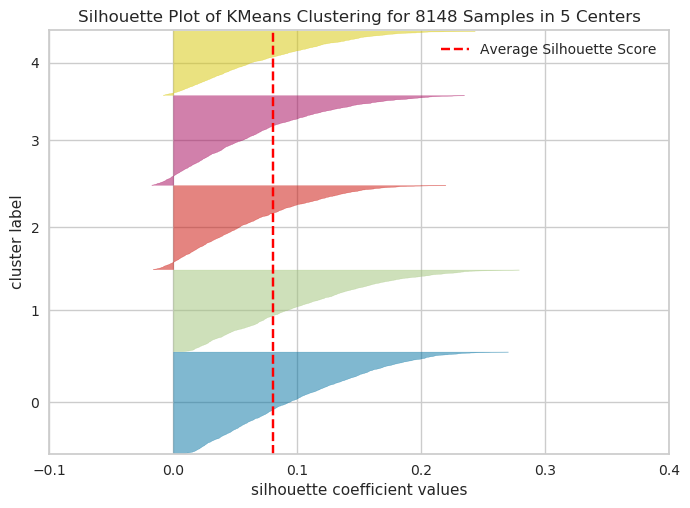

In [37]:
cluster = KMeans(5, random_state=101)
vis = SilhouetteVisualizer(cluster, colors='yellowbrick')
vis.fit(three_q_pca)
vis.show();